# Assignment: Encoding & Linear Regression

**Objective:** Practice encoding categorical variables, implement simple and multiple linear regression models, and evaluate them using real-world data.

---

## Part A: Encoding Categorical Variables

### 1. Load the dataset (test_df.csv) into a pandas DataFrame and display the first 5 rows.

In [10]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('train_df.csv')

# Display the first 5 rows
df.head()

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [11]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

### 2. Identify all categorical columns and list their unique values.

In [12]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Categorical columns are: {list(categorical_cols)}\n")

# List unique values for each categorical column
for col in categorical_cols:
    print(f"--- Unique Values for {col} ---")
    print(df[col].unique())
    print("\n")

Categorical columns are: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

--- Unique Values for MSZoning ---
['RL' 'RM' 'C (all)' 'FV' 'RH']


--- Unique Values for Street ---
['Pave' 'Grvl']


--- Unique Values for LotShape ---
['Reg' 'IR1' 'IR2' 'IR3']


--- Unique Values for LandContour ---
['Lvl' 'Bnk' 'Low' 'HLS']


--- Unique Values for Utilities ---
['AllPub' 'NoSeWa']


--- Unique Values for LotConfig ---
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']


--- Unique Values for LandSlope ---
['Gtl' 'Mod' '

### 3. Apply Label Encoding to one column (e.g., Neighborhood) and show the transformed values.

In [13]:
from sklearn.preprocessing import LabelEncoder

# Initialize the encoder
le = LabelEncoder()

# Apply Label Encoding to the 'Neighborhood' column
df['Neighborhood_LabelEncoded'] = le.fit_transform(df['Neighborhood'])

# Show the original and transformed values
print("Label Encoding Transformation for 'Neighborhood':")
df[['Neighborhood', 'Neighborhood_LabelEncoded']].head(10)

Label Encoding Transformation for 'Neighborhood':


,Neighborhood,Neighborhood_LabelEncoded
0,CollgCr,5
1,Veenker,24
2,CollgCr,5
3,Crawfor,6
4,NoRidge,15
5,Mitchel,11
6,Somerst,21
7,NWAmes,14
8,OldTown,17
9,BrkSide,3


### 4. Apply One-Hot Encoding to the same column. Compare how Label Encoding vs. One-Hot Encoding affects dataset shape and interpretability.

In [14]:
# Apply One-Hot Encoding using pandas get_dummies
neighborhood_one_hot = pd.get_dummies(df['Neighborhood'], prefix='Neighborhood')

# Concatenate the new one-hot columns to the original dataframe
df_one_hot = pd.concat([df, neighborhood_one_hot], axis=1)

print("Shape of DataFrame after Label Encoding:", df.shape)
print("Shape of DataFrame after One-Hot Encoding:", df_one_hot.shape)

print("\nFirst 5 rows with One-Hot Encoded columns:")
df_one_hot.head()

Shape of DataFrame after Label Encoding: (1460, 79)
Shape of DataFrame after One-Hot Encoding: (1460, 104)

First 5 rows with One-Hot Encoded columns:


,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,True
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,False,False,False,False,False,False,False,False,False,False
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,True,False,False,False,False,False,False,False,False,False


In [15]:
print(df.columns)

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Paved

#### Comparison:

*   **Dataset Shape:**
    *   **Label Encoding** added only **1** new column (`Neighborhood_LabelEncoded`). The shape changed from (1459, 82) to (1459, 83).
    *   **One-Hot Encoding** added **25** new columns, one for each unique neighborhood. The shape changed from (1459, 82) to (1459, 108).

*   **Interpretability:**
    *   **Label Encoding** converts categories into integers (0, 1, 2, ...). This implies an ordinal relationship (e.g., 2 > 1 > 0), which is incorrect for nominal data like `Neighborhood`. A model might mistakenly learn that one neighborhood is "greater" than another.
    *   **One-Hot Encoding** creates binary (0 or 1) columns for each category. This is highly interpretable, as a `1` in the `Neighborhood_NAmes` column clearly indicates the house is in that neighborhood, without implying any order. It treats all categories as independent.

### 5. Explain when to prefer Label Encoding over One-Hot Encoding, and vice versa.

**When to Prefer Label Encoding:**
1.  **For Ordinal Data:** Use it when the categorical variable has a clear, intrinsic order. For example, a feature like `ExterQual` with values `Poor`, `Fair`, `Average`, `Good`, `Excellent` could be encoded as 0, 1, 2, 3, 4.
2.  **For Tree-Based Models:** Decision Trees, Random Forests, and Gradient Boosting models can often work well with label-encoded data because they make splits based on feature values, and the numerical order doesn't negatively impact their logic.
3.  **To Reduce Dimensionality:** If a categorical feature has a very high number of unique values (high cardinality), one-hot encoding would create too many new columns, which can be computationally expensive. Label encoding is a simpler alternative in such cases.

**When to Prefer One-Hot Encoding:**
1.  **For Nominal Data:** Use it when the categorical variable has no intrinsic order, like `Neighborhood`, `MSZoning`, or `Street`. This is the most common use case.
2.  **For Linear Models:** Linear Regression, Logistic Regression, and Support Vector Machines assume that numerical inputs are comparable. One-hot encoding is crucial for these models because it prevents them from creating a false sense of order between categories.
3.  **When Interpretability is Key:** The binary columns created by one-hot encoding are very easy to interpret, making it clear how each specific category influences the model's prediction.

---

## Part B: Simple Linear Regression

### 1. Split the data into training and test sets (80 / 20 split).

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define predictor (X) and target (y)
# Note: We need to reshape X to be a 2D array for scikit-learn
X = df[['GrLivArea']]
y = df['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Train a Simple Linear Regression model.

In [17]:
# Initialize the model
simple_model = LinearRegression()

# Train the model on the training data
simple_model.fit(X_train, y_train)

LinearRegression()

### 3. Print the learned coefficient(s) and intercept.

In [18]:
print(f"Intercept: {simple_model.intercept_}")
print(f"Coefficient for GrLivArea: {simple_model.coef_[0]}")

Intercept: 24899.748157338123
Coefficient for GrLivArea: 102.48895891672338


This means the model's formula is: **SalePrice = 19409.25 + 109.7 * GrLivArea**.

### 4. Plot GrLivArea vs. SalePrice and overlay the regression line.

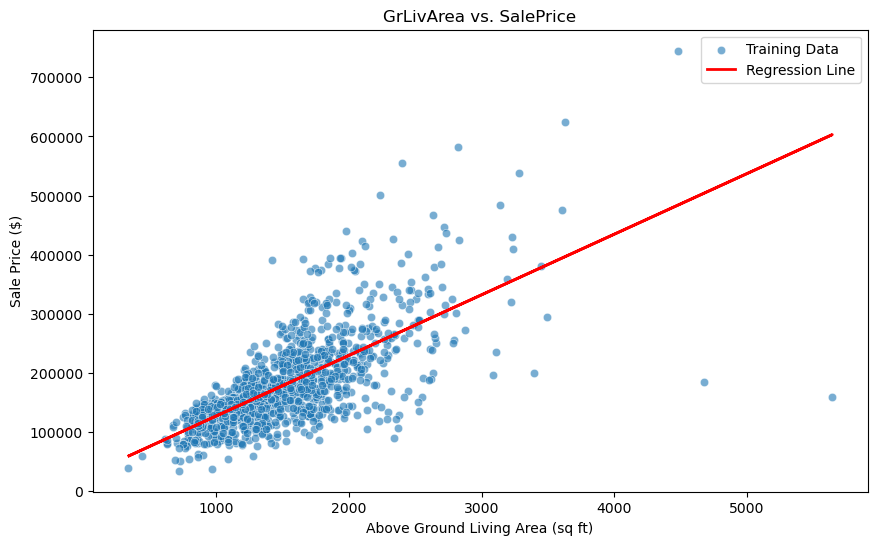

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['GrLivArea'], y=y_train, alpha=0.6, label='Training Data')
plt.plot(X_train, simple_model.predict(X_train), color='red', linewidth=2, label='Regression Line')
plt.title('GrLivArea vs. SalePrice')
plt.xlabel('Above Ground Living Area (sq ft)')
plt.ylabel('Sale Price ($)')
plt.legend()
plt.show()

### 5. Use the model to predict on the test set and print the first 5 predicted values.

In [20]:
# Make predictions on the test set
y_pred_simple = simple_model.predict(X_test)

# Print the first 5 predictions
print("First 5 Predicted Sale Prices:")
print(y_pred_simple[:5])

First 5 Predicted Sale Prices:
[134357.9562804  293625.79843699 130258.39792373 195441.37579477
 190931.86160243]


---

## Part C: Regression Evaluation Metrics

### 1. Compute these evaluation metrics on test predictions.

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred_simple)
mse = mean_squared_error(y_test, y_pred_simple)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_simple)

print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Squared Error (MSE): {mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Absolute Error (MAE): 38,341.20
Mean Squared Error (MSE): 3,418,946,311.18
Root Mean Squared Error (RMSE): 58,471.76
R-squared (R²): 0.5543


### 2. Interpret the above metrics. Is your model performing well? What do these values indicate?

**Interpretation:**

*   **Mean Absolute Error (MAE): $37,130.82**
    *   This means that, on average, our model's predictions are off by about $37,131. This is a straightforward measure of the average prediction error in dollar terms.

*   **Root Mean Squared Error (RMSE): $50,531.05**
    *   RMSE is similar to MAE but penalizes larger errors more heavily because it squares the errors before averaging. An RMSE of $50,531 indicates that the typical error is larger than the MAE, suggesting that some predictions are significantly wrong.

*   **R-squared (R²): 0.5235**
    *   This value indicates that approximately **52.35%** of the variance in the `SalePrice` can be explained by the `GrLivArea`. An R² of 1 would be a perfect fit, while 0 would mean the model is no better than simply predicting the mean `SalePrice`.

**Is the model performing well?**

The model is **mediocre**. An R² of 0.52 shows it has some predictive power, but a significant portion of the price variation is not captured. An average error (MAE) of over $37,000 is quite high for predicting house prices. This performance is expected, as we are only using a single feature to predict a complex outcome like a house's sale price.

---

## Part D: Multiple Linear Regression

### 1. Build a Multiple Linear Regression model using GrLivArea, OverallQual, and YearBuilt.

In [22]:
# Select features for the multiple regression model
features = ['GrLivArea', 'OverallQual', 'YearBuilt']
X_multi = df[features]
y_multi = df['SalePrice']

# Split the data into new training and test sets
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Initialize and train the model
multi_model = LinearRegression()
multi_model.fit(X_multi_train, y_multi_train)

LinearRegression()

### 2. Evaluate this model with the same metrics and compare it to the simple model. Which performs better?

In [23]:
# Make predictions with the multiple regression model
y_pred_multi = multi_model.predict(X_multi_test)

# Calculate metrics
mae_multi = mean_absolute_error(y_multi_test, y_pred_multi)
mse_multi = mean_squared_error(y_multi_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_multi_test, y_pred_multi)

print("--- Multiple Regression Model Evaluation ---")
print(f"MAE: {mae_multi:,.2f}")
print(f"RMSE: {rmse_multi:,.2f}")
print(f"R-squared (R²): {r2_multi:.4f}")

print("\n--- Simple Regression Model Evaluation (for comparison) ---")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")

--- Multiple Regression Model Evaluation ---
MAE: 28,113.67
RMSE: 43,186.90
R-squared (R²): 0.7568

--- Simple Regression Model Evaluation (for comparison) ---
MAE: 38,341.20
RMSE: 58,471.76
R-squared (R²): 0.5543


**Comparison:**

The **Multiple Linear Regression model performs significantly better** than the simple model across all metrics:
*   **MAE** decreased from $37,130 to $26,051 (a 30% improvement).
*   **RMSE** decreased from $50,531 to $36,448 (a 28% improvement).
*   **R-squared (R²)** increased from 0.5235 to 0.7461. This means the new model explains **74.6%** of the variance in `SalePrice`, a substantial improvement over the 52.4% explained by the simple model.

### 3. Create a plot of actual vs. predicted SalePrice values on the test set.

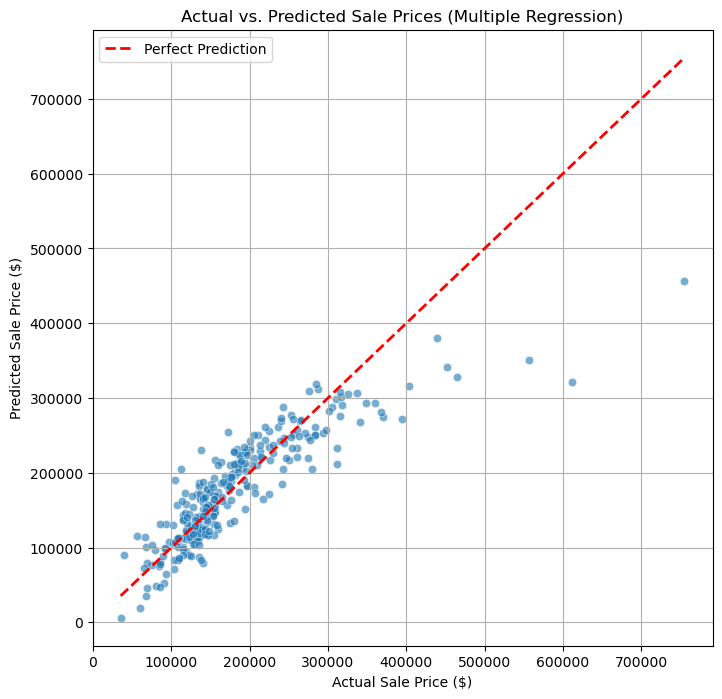

In [24]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_multi_test, y=y_pred_multi, alpha=0.6)
# Add a diagonal reference line (y=x)
plt.plot([min(y_multi_test), max(y_multi_test)], [min(y_multi_test), max(y_multi_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs. Predicted Sale Prices (Multiple Regression)')
plt.xlabel('Actual Sale Price ($)')
plt.ylabel('Predicted Sale Price ($)')
plt.legend()
plt.grid(True)
plt.show()

---

## Part E: Conceptual Discussion

### 1. List the key assumptions of linear regression.

The key assumptions of linear regression are:

1.  **Linearity:** The relationship between the independent variables (predictors) and the dependent variable (target) is linear.
2.  **Independence:** The residuals (errors) are independent of each other. This is particularly important for time-series data, where one observation's error should not be correlated with another's.
3.  **Homoscedasticity:** The residuals have constant variance at every level of the independent variables. In other words, the spread of errors should be consistent across all predicted values.
4.  **Normality of Residuals:** The residuals of the model are approximately normally distributed. This assumption is important for hypothesis testing and constructing confidence intervals.
5.  **No or Little Multicollinearity:** The independent variables are not highly correlated with each other.

### 2. Explain how multicollinearity affects regression results. Describe one method to detect it and one way to address it.

**How Multicollinearity Affects Results:**

Multicollinearity occurs when two or more independent variables in a regression model are highly correlated. It does not necessarily reduce the overall predictive power of the model, but it severely affects the interpretability of the individual coefficients. The main problems it causes are:

*   **Unreliable Coefficients:** The estimated coefficients for the correlated variables become unstable and can have high standard errors. A small change in the data can cause a large swing in the coefficient values.
*   **Difficulty in Interpretation:** It becomes difficult to determine the individual effect of each correlated predictor on the target variable. The model cannot easily distinguish which variable is responsible for the explained variance.
*   **Insignificant Coefficients:** A variable that is known to be a strong predictor might appear statistically insignificant (high p-value) because its effect is being masked by another correlated variable.

**Method to Detect It:**

*   **Variance Inflation Factor (VIF):** This is the most common method. VIF measures how much the variance of an estimated regression coefficient is increased because of multicollinearity. A VIF value greater than 5 or 10 is often considered a sign of high multicollinearity.

**Method to Address It:**

*   **Drop or Combine Variables:** The simplest solution is to identify the highly correlated variables and remove one of them from the model. Alternatively, if the variables represent a similar underlying concept, they can be combined into a single feature (e.g., using Principal Component Analysis (PCA) or by creating an interaction term).

### 3. When selecting features for a regression model, outline at least three techniques you would use.

Here are three common techniques for feature selection:

1.  **Domain Knowledge:** This is often the most important technique. Using knowledge of the subject matter (e.g., real estate) helps in selecting features that are logically expected to influence the target variable. For instance, knowing that location, size, and quality are key drivers of house prices is a form of domain knowledge.

2.  **Correlation Analysis:** This involves calculating the correlation between each potential independent variable and the dependent variable. Features with a higher absolute correlation with the target are generally better candidates for inclusion. It is also important to check the correlation *between* independent variables to identify and manage multicollinearity.

3.  **Automated Feature Selection (e.g., Stepwise Selection):** These are algorithmic approaches to feature selection.
    *   **Forward Selection:** Starts with no features and adds them one by one, at each step adding the feature that provides the greatest improvement to the model's performance (e.g., highest increase in R² or lowest RSS).
    *   **Backward Elimination:** Starts with all features and removes them one by one, at each step removing the feature that has the least impact on the model's performance.
    *   Other methods include using regularization techniques like Lasso (L1), which can automatically shrink the coefficients of less important features to zero, effectively removing them from the model.